<a href="https://colab.research.google.com/github/atlas-github/20190731StarMediaGroup/blob/master/production_planning/timeseriesforecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[Prophet](https://facebook.github.io/prophet/docs/quick_start.html#python-api)

In [1]:
#step 1: import libraries

import pandas as pd
from prophet import Prophet

In [4]:
#step 2: provide data

df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [3]:
#step 3: create model and fit it

m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj43pmagy/yc1byosy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj43pmagy/c6hlywhu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12711', 'data', 'file=/tmp/tmpj43pmagy/yc1byosy.json', 'init=/tmp/tmpj43pmagy/c6hlywhu.json', 'output', 'file=/tmp/tmpj43pmagy/prophet_model8k3t227n/prophet_model-20230709135029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:50:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:50:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [6]:
#step 4: get results

future = m.make_future_dataframe(periods=365)
future

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14
...,...
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18


In [9]:
#step 5: predict response

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2007-12-10,8.842064,8.206424,9.424303
1,2007-12-11,8.590598,7.969495,9.166716
2,2007-12-12,8.386452,7.793248,8.990220
3,2007-12-13,8.364357,7.743227,8.968910
4,2007-12-14,8.352354,7.747088,8.999199
...,...,...,...,...
3265,2017-01-15,8.208305,7.400962,8.937459
3266,2017-01-16,8.533309,7.794932,9.234595
3267,2017-01-17,8.320714,7.534125,9.058204
3268,2017-01-18,8.153356,7.416799,8.850112


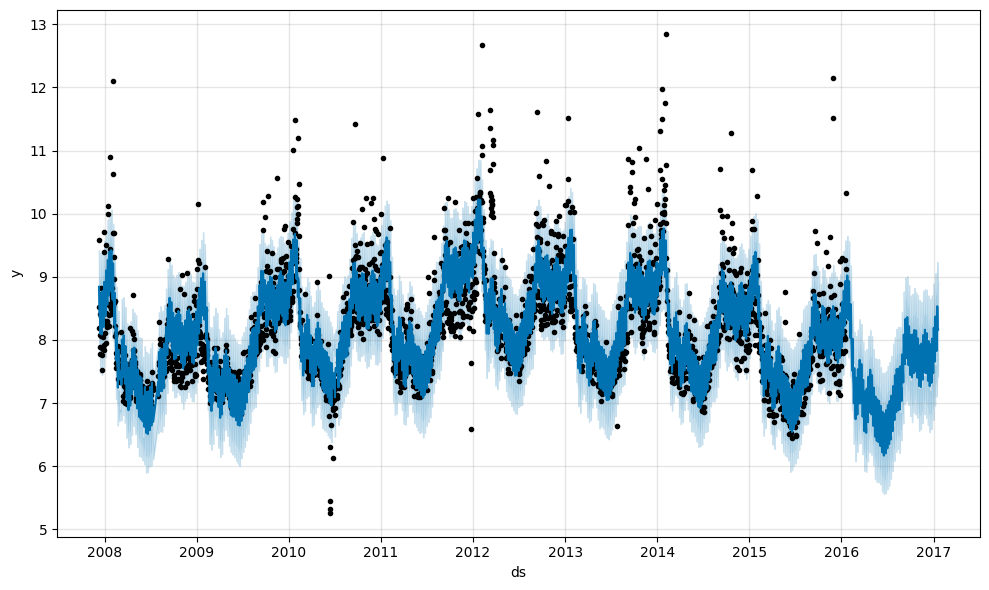

In [10]:
fig1 = m.plot(forecast)

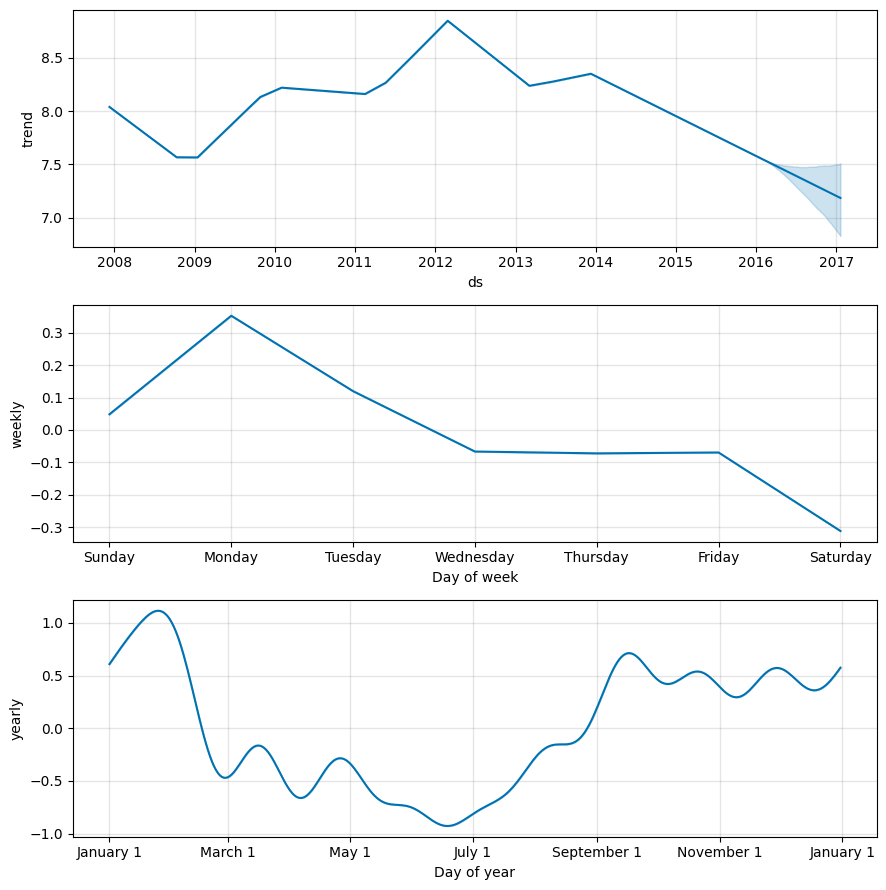

In [11]:
fig2 = m.plot_components(forecast)

In [12]:
#use plotly for interaction

from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [13]:
plot_components_plotly(m, forecast)

#Classic Time Series Forecasting Algorithms

##[ARIMA](https://www.analyticsvidhya.com/blog/2020/10/how-to-create-an-arima-model-for-time-series-forecasting-in-python/) for beginners

In [49]:
# step 1: load libraries
from statsmodels.tsa.arima.model import ARIMA
from random import random

# step 2: provide data
data = [x + random() for x in range(1, 100)]

# step 3: create model and fit it
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()

# step 4: get results (by backtesting)


# step 5: predict response
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)

[100.75516115]


In [48]:
data

[1.338470321661938,
 2.3113230475048114,
 3.4503267934984647,
 4.821929876872442,
 5.210398869519584,
 6.688193351394087,
 7.97764487678314,
 8.93544912818489,
 9.14309223432509,
 10.985317751852108,
 11.112108902856146,
 12.287502072507506,
 13.208760248274219,
 14.850753475445885,
 15.515566590574544,
 16.50494167790672,
 17.907200288805015,
 18.31891625962139,
 19.882887732499984,
 20.782172167212963,
 21.467484855485036,
 22.62239207386321,
 23.041318102371047,
 24.80629388326803,
 25.598150536596734,
 26.858883239078637,
 27.101404206449217,
 28.943179144660263,
 29.25503528182039,
 30.10905123848643,
 31.399127954414134,
 32.82546033583188,
 33.680647698159675,
 34.108843174888236,
 35.48558357180209,
 36.66850876712576,
 37.699478420213225,
 38.40285990836551,
 39.661074917358135,
 40.777810328535324,
 41.29186642792358,
 42.945072439271186,
 43.44370447706283,
 44.37940650586775,
 45.11691734596477,
 46.00755495178829,
 47.299280596733155,
 48.64265768287508,
 49.34156615544967

##[ARIMA and variants](https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/)

In [16]:
#Autoregression

#Suitable for univariate time series without trend and seasonal components

In [17]:
#Moving Average

#Suitable for univariate time series without trend and seasonal components.

In [18]:
#Autoregressive Moving Average (ARMA)

#Suitable for univariate time series without trend and seasonal components.

In [19]:
#Autoregressive Integrated Moving Average (ARIMA)

#suitable for univariate time series with trend and without seasonal components.

In [28]:
#Seasonal Autoregressive Integrated Moving-Average (SARIMA)

#Suitable for univariate time series with trend and/or seasonal components.
##TO BE CONSIDERED

In [29]:
#Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

#Suitable for univariate time series with trend and/or seasonal components and exogenous variables.
##TO BE CONSIDERED

In [22]:
#Vector Autoregression (VAR)

#Suitable for multivariate time series without trend and seasonal components.

In [23]:
#Vector Autoregression Moving-Average (VARMA)

#Suitable for multivariate time series without trend and seasonal components.

In [25]:
#Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)

#Suitable for multivariate time series without trend and seasonal components with exogenous variables.

In [26]:
#Simple Exponential Smoothing (SES)

#Suitable for univariate time series without trend and seasonal components.

In [30]:
#Holt Winter’s Exponential Smoothing (HWES)

#Suitable for univariate time series with trend and/or seasonal components.
##TO BE CONSIDERED

#[DeepAR](https://docs.aws.amazon.com/sagemaker/latest/dg/deepar.html) by AWS

In [14]:
#I have not tested this
#An AWS account with access to SageMaker might be needed (need $$$)

#[pycaret](https://pycaret.gitbook.io/docs/#time-series) time series

In [32]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [36]:
#loading sample dataset

from pycaret.datasets import get_data
data = get_data("airline")

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Freq: M, Name: Number of airline passengers, dtype: float64

In [37]:
#init setup

from pycaret.time_series import *
s = setup(data, fh = 3, session_id = 3)

,Description,Value
0,session_id,3
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(141, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [38]:
#model training and selection

best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
stlf,STLF,0.4136,0.4530,12.7373,15.8272,0.0262,0.0261,0.2016,0.0767
ets,ETS,0.4912,0.5541,15.0940,19.3099,0.0318,0.0316,-0.4465,0.1700
exp_smooth,Exponential Smoothing,0.4929,0.5560,15.1460,19.3779,0.0320,0.0317,-0.4600,2.1333
arima,ARIMA,0.6964,0.7110,21.3757,24.7774,0.0447,0.0456,-0.5495,0.2900
auto_arima,Auto ARIMA,0.7136,0.6945,21.9390,24.2138,0.0459,0.0464,-0.5454,37.3567
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.8658,0.8362,26.7826,29.3947,0.0516,0.0536,0.1501,0.3067
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.8904,0.8722,27.5266,30.6243,0.0534,0.0555,-0.0092,0.3233
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.8905,0.8722,27.5270,30.6246,0.0534,0.0555,-0.0092,0.1767
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.8944,0.8746,27.6535,30.7127,0.0535,0.0557,-0.0063,0.1767
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.8966,0.8759,27.7231,30.7594,0.0536,0.0558,-0.0040,0.1767


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

In [39]:
#plot trained model

s.plot_model(best)

In [40]:
#predict on hold-out/test set

pred_holdout = s.predict_model(best)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,STLF,0.3305,0.3157,10.5518,11.4475,0.0255,0.0252,0.8457


In [41]:
#predict in unseen future

predictions = s.predict_model(best, fh = 36)

In [ ]:
#save model
s.save_model(best, "best_pipeline")